In [70]:
# Importing the Libraries

import yfinance as yf # yfinance
import pandas as pd # pandas
from bs4 import BeautifulSoup #beautiful soup
import requests #requests


In [80]:
tesla = yf.Ticker("TSLA")
tesla_share_data = tesla.history(period = "max")
tesla_share_data.reset_index(inplace=True)
tesla_share_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<Axes: xlabel='Date'>

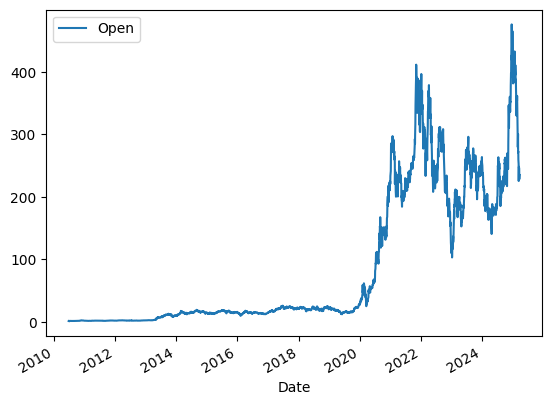

In [81]:
tesla_share_data.plot(x="Date",y="Open")

In [74]:
tesla_url = "https://companiesmarketcap.com/tesla/revenue/"

In [75]:
tesla_data  = requests.get(tesla_url).text
soup = BeautifulSoup(tesla_data, 'html.parser')

In [76]:
table = soup.tbody
rows = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if cells:  # Only process rows with data
        rows.append([cell.text for cell in cells])

In [77]:
columns = []
for tr in soup.thead.find_all("tr"):
    for th in tr.find_all("th"):
        columns.append(th.text)
columns

['Year', 'Revenue', 'Change']

In [78]:
df_tesla = pd.DataFrame(data=rows, columns=columns) 

In [82]:
df_tesla.tail()

,Year,Revenue,Change
11,2013,$2.01 B,387.23%
12,2012,$0.41 B,102.34%
13,2011,$0.20 B,74.95%
14,2010,$0.11 B,4.29%
15,2009,$0.11 B,


In [83]:
gme = yf.Ticker("GME")
gme_share_data = gme.history(period = "max")
gme_share_data.reset_index(inplace=True)
gme_share_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<Axes: xlabel='Date'>

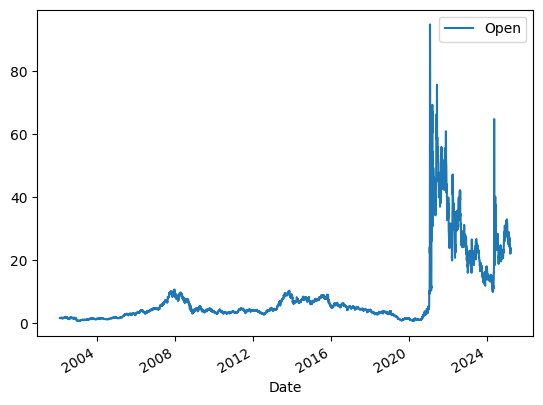

In [84]:
gme_share_data.plot(x="Date",y="Open")

In [86]:
gme_url = "https://companiesmarketcap.com/gamestop/revenue/"

In [89]:
gme_data  = requests.get(gme_url).text
soup = BeautifulSoup(gme_data, 'html.parser')
table = soup.tbody
rows = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if cells:  # Only process rows with data
        rows.append([cell.text for cell in cells])
columns = []
for tr in soup.thead.find_all("tr"):
    for th in tr.find_all("th"):
        columns.append(th.text)

df_gme = pd.DataFrame(data=rows, columns=columns)
df_gme.tail()

,Year,Revenue,Change
19,2005,$3.09 B,67.78%
20,2004,$1.84 B,16.72%
21,2003,$1.57 B,16.71%
22,2002,$1.35 B,20.66%
23,2001,$1.12 B,
